In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.contingency import expected_freq
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Задание
## Вариант 8.

Обработайте статистические данные 100 независимых измерений некоторой физической величины Х.

а) Составьте статистическое распределение частот выборки Х.

б) Найдите эмпирическую функцию распределения и постройте ее график.

в) Постройте полигон и гистограмму относительных частот.

г) Вычислите числовые характеристики:

• выборочную среднюю;

• выборочную дисперсию;

• выборочное среднее квадратическое отклонение;

• коэффициенты эксцесса и ассиметрии.

д) Выдвинув гипотезу о нормальном распределении, проверьте ее критерием согласия Пирсона при уровне значимости а = 0.05.

е) Найдите точечные и интервальные оценки параметров распределения (доверительную вероятность принять равной 0.95). 

# Чтение из файла и гистограмма величин X

In [2]:
data=pd.read_csv('data.csv')
data.head()


,X,Y
0,174,70
1,166,57
2,161,55
3,172,60
4,166,57


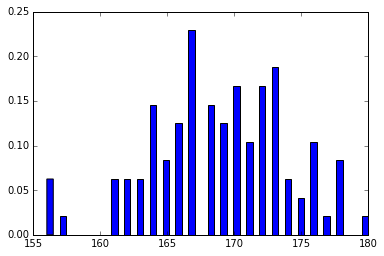

In [3]:
plt.hist(data['X'],50, normed='True')
plt.show()

# Подсчет и вывод частот для xk

In [4]:
X_max=max(data['X'])
X_min=min(data['X'])
R=X_max-X_min
K=int(round(1.0+3.32*np.log10(100)))
H=int(R/K)

print("\nМаксимум")
print(X_max)

print("\nМинимум")
print(X_min)

print("\nДельта макс. и мин.")
print(R)
               
print("\nКол-во отрезков")
print(K)

print("\nШаг")             
print(H)


Максимум
180

Минимум
156

Дельта макс. и мин.
24

Кол-во отрезков
8

Шаг
3



 Частоты по интервалам:
[0.04, 0.06, 0.14, 0.24, 0.19, 0.2, 0.08, 0.05]

 Сумма частот:
1


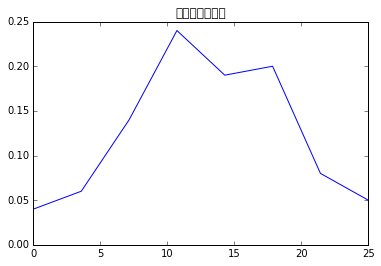

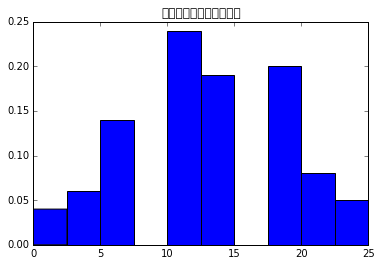

In [5]:
def intervals_cumsum(x_min,step,size):
    start=x_min;a=[];b=[]
    for i in range(size):
        a.append(start)
        start+=step
        b.append(start)
    return a,b

def count_values(data,element):
    count=0;counts=[]
    for item in data['X']:
        if item<=element:
            count+=1
    return count
   
def counter_in(data,b):
    delta=[];f=0
    for index in range(len(b)):
        first=count_values(data,b[index])-f
        delta.append(first)
        f+=first
    return delta
  
        
def frequences(ni,n):
    freq=[]
    for item in ni:
        freq.append(item/n)
    return freq
        
a,b=intervals_cumsum(X_min,H,K)
ni=counter_in(data,b)
freq=frequences(ni,100)
print('\n Частоты по интервалам:')
print(freq)
print('\n Сумма частот:')
print(round(sum(freq)))

x=np.linspace(0,25,8)
plt.plot(x,freq)
plt.title('Полигон')
plt.show()


plt.hist(x,10,weights=freq)
plt.title('Гистограмма')
plt.show()


# Эмпирическая функция распределения

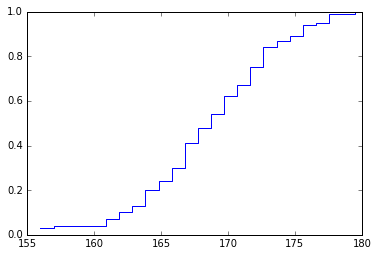

In [6]:
ecdf = sm.distributions.ECDF(data['X'])
x = np.linspace(min(data['X']), max(data['X']))
y = ecdf(x)
plt.step(x, y)
plt.show()

# Числовые характеристики

In [7]:
print("\nНормальность распределения (Критерий Колмогорова):")

print(stats.kstest(data['X'], 'norm'))

print("\nМода выборки:")

print(stats.mode(data['X']))

print("\nМедиана:")

print(np.median(data['X']))

print("\nСреднее значение:")


print(np.mean(data['X']))

print("\nДисперсия:")

print(np.var(data['X']))

print("\nСреднее квадратичное отклонение:")

print(np.std(data['X']))

print("\nКоэффициент вариации:")

print(np.var(data['X']))

print("\nКоэффициент асимметрии:")

print(stats.skew(data['X']))

print("\nЭксцесс:")

print(stats.kurtosis(data['X'])) 


Нормальность распределения (Критерий Колмогорова):
KstestResult(statistic=1.0, pvalue=0.0)

Мода выборки:
ModeResult(mode=array([167]), count=array([11]))

Медиана:
169.0

Среднее значение:
168.83

Дисперсия:
25.8411

Среднее квадратичное отклонение:
5.083414207006941

Коэффициент вариации:
25.8411

Коэффициент асимметрии:
-0.2649654163821299

Эксцесс:
-0.041702247996938446


# Точечные и интервальные оценки параметров распределения 

In [8]:
T_coef=1.98

def get_mean_intervals(a,b):
    means=[]
    for i in range(len(a)):
        means.append((a[i]+b[i])/2)
    return means

def mean_mult_freq(means,freq):
    m=[]
    for i in range(len(means)):
        m.append(means[i]*freq[i])
    return m

def get_d(means):
    data=[]
    for item in means:
        data.append(round(item-sum(mean_mult_freq(means,freq)),2))
    return data

def get_d2(d,freq):
    data=[]
    for i in range(len(d)):
        data.append(round(d[i]**2*freq[i],2))
    return data

means=get_mean_intervals(a,b)

d=get_d(means)
d=get_d2(d,freq)

# def find_s(data,mean):
#     summ=0.0
#     for item in data['X']:
#         summ+=(item-mean)**2
#     return np.sqrt(summ)

S=np.sqrt(sum(d)*100/99)
yolo=T_coef*S/np.sqrt(len(data['X']))
xmax=round(np.mean(data['X'])+yolo,2)
xmin=round(np.mean(data['X'])-yolo,2)

Интервальная оценка

In [9]:
print(str(xmin)+'<a<'+str(xmax))

167.83<a<169.83


In [10]:
coef_corr=stats.pearsonr(data['X'],data['Y'])
print(coef_corr)

(0.6507666866642714, 2.319174102676314e-13)


Вывод:
coef_corr должны быть равны нулю т.к X и Y независимы, но этого не происходит, следовательно переменные X и Y имеют нормальное распределение.

# Регрессия


 Коэффициент линейной регрессии
0.8748195703743263

 R-квадрат
0.42349728047199375

 Уравнение регрессии
y=0.8748195703743263*(x-168.83)+64.39

 Множественный R
0.6507666866642716

 Нормированный R квадрат
0.413998338640049

 Стандартная ошибка
5.109023508667896

 Наблюдения
100


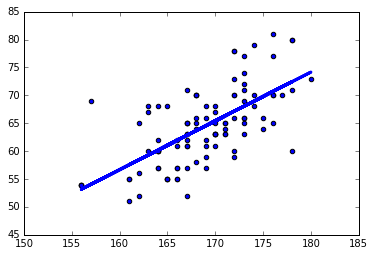

In [42]:
lr=LinearRegression().fit(data[['X']], data[['Y']])

print('\n Коэффициент линейной регрессии')
print(lr.coef_[0][0])
print('\n R-квадрат')
print(lr.score(data[['X']], data[['Y']]))
print('\n Уравнение регрессии')
print('y='+str(lr.coef_[0][0])+'*'+'(x-'+str(np.mean(data['X']))+')'+'+'+str(np.mean(data['Y'])))
print('\n Множественный R')
print(data.corr()['Y'][0])
print('\n Нормированный R квадрат')
print(1-(1-data.corr()['Y'][0])*(len(data['X'])-1)/(len(data['X'])-41))
print('\n Стандартная ошибка')
print(np.std(data['X'], ddof=1)) 
print('\n Наблюдения')
print(len(data['X'])) 


plt.plot(data[['X']], lr.predict(data[['X']]), color='blue',linewidth=3)
plt.scatter(data['X'],data['Y'])
plt.show()
